# **TA #1 - Python version**

## Foundation of Econometrics - DSDM 2025-2026

**Lucia Sauer**

**Contact:** [lucia.sauer@bse.eu](mailto:lucia.sauer@bse.eu)

In this notebook we will review:

+ Matrix manipulation: linear systems in matrix form
+ Simulation of Random Variables
+ Conditional Sample Means and Medians
+ Density Histograms
+ Bivariate Normal

## Importing necessary libraries

In [1]:
import numpy as np              
import pandas as pd            
import matplotlib.pyplot as plt        
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", context="talk")
np.random.seed(123)

# ---------------------------
# 1. Generate fake data
# ---------------------------
n = 200
df = pd.DataFrame({
    "x": np.random.normal(0, 1, n),
    "y": np.random.normal(5, 2, n),
    "group": np.random.choice(["A", "B", "C"], n)
})
df["y_linear"] = 2 + 0.8*df["x"] + np.random.normal(0, 0.5, n)

# ---------------------------
# 2. Plot 1: Distribution of a normal variable
# ---------------------------
plt.figure(figsize=(6,4))
sns.histplot(df["x"], kde=True, bins=20, color="blue")
plt.title("Distribution of X (Normal Variable)")
plt.xlabel("X")
plt.ylabel("Frequency")
plt.savefig("plot_distribution.pdf", bbox_inches='tight')
plt.close()

# ---------------------------
# 3. Plot 2: Lineplot
# ---------------------------
plt.figure(figsize=(6,4))
sns.lineplot(x="x", y='y', data=df, hue='group')
plt.title("Distribution of X (Normal Variable)")
plt.xlabel("X")
plt.ylabel("Frequency")
plt.savefig("plot_distribution.pdf", bbox_inches='tight')
plt.close()



# ---------------------------
# 4. Plot 3: Linear regression with marginal distributions
# ---------------------------
sns.jointplot(
    data=df,
    x="x",
    y="y_linear",
    kind="reg",
    marginal_kws=dict(bins=20, fill=True),
    height=6,
    color="purple"
)
plt.savefig("plot_regression_marginals.pdf", bbox_inches='tight')
plt.close()


sns.residplot(x=df['x'][:30], y=df['y'][:30], lowess=True, color="black")
plt.savefig("residuals.pdf", bbox_inches='tight')
plt.close()

print("Plots saved as PDF files for LaTeX inclusion!")


Plots saved as PDF files for LaTeX inclusion!


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

sns.set(style="whitegrid", context="talk")
np.random.seed(123)

# Generate data
data_left   = skewnorm.rvs(a=-0.8, size=1000, loc=-4)
data_center = np.random.normal(loc=0, scale=1, size=1000)
data_right  = skewnorm.rvs(a=0.8, size=1000, loc=4)

# Palette
palette = sns.color_palette("magma", 3)

# Plot
fig, ax = plt.subplots(figsize=(9,6))
sns.kdeplot(data_left,   fill=True, color=palette[0], ax=ax, label="Left-skewed")
sns.kdeplot(data_center, fill=True, color=palette[1], ax=ax, label="Symmetric")
sns.kdeplot(data_right,  fill=True, color=palette[2], ax=ax, label="Right-skewed")

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set bottom and left spines to black
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)

# Set ticks to only bottom and left
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Labels
ax.set_xlabel("Value")
ax.set_ylabel("Density")
# --- Custom legend ---
ax.legend(
    fontsize=10,   # smaller font
    frameon=False, # no border
    loc='upper right',
    title=None
)
plt.savefig("distributions.svg", bbox_inches='tight')  # vector format, tight bounding box
plt.close()


# 1. Matrix manipulation

Solving a system of equations in Python

`Example 1`

Consider the system of equations:

\begin{aligned}
    2x_1 + 3x_2 &= 5 \\
    4x_1 + x_2 &= 6
\end{aligned}

In [2]:
# Define matrix A and vector b
A = np.array([[2, 3], [4, 1]])
b = np.array([5, 6])

# Transpose of A
A_transpose = np.transpose(A)
print('A: \n', A)
print('A transpose: \n', A_transpose)

# Inverse of A
A_inverse = np.linalg.inv(A)
print('A inverse: \n', A_inverse)

# Matrix multiplication
x = np.dot(A_inverse, b)

print("Solution: \n", x)

A: 
 [[2 3]
 [4 1]]
A transpose: 
 [[2 4]
 [3 1]]
A inverse: 
 [[-0.1  0.3]
 [ 0.4 -0.2]]
Solution: 
 [1.3 0.8]


`Example 2`

Consider the following system:

\begin{aligned}
    x_1 + x_2 + x_3 &= 6 \\
    2x_1 - x_2 + 3x_3 &= 14 \\
    -x_1 + 4x_2 + x_3 &= 8
\end{aligned}

In [3]:
# Define matrix A and vector b
A = np.array([[1, 1, 1], [2, -1, 3], [-1, 4, 1]])
b = np.array([6, 14, 8])

# Solve the system
x = np.linalg.solve(A, b)

print("Solution: \n", x)

Solution: 
 [0.36363636 0.90909091 4.72727273]


`Example 3`

Consider the following system:

\begin{aligned}
    x_1 + x_2 + x_3 + x_4 &= 2 \\
    x_1 - x_2 + x_3 &= 0 \\
    x_1 + x_3 + x_4 &= 1 \\
    2x_1 + 2x_2 + 2x_3 + 2x_4 &= 4
\end{aligned}

In [4]:
# Define matrix A and vector b for a system with no unique solution
A = np.array([[1, 1, 1, 1], 
              [1, -1, 1, 0], 
              [1, 0, 1, 1], 
              [2, 2, 2, 2]])
b = np.array([2, 0, 1, 4])

# Solve the system
try:
    x = np.linalg.solve(A, b)
    print("Solution: ", x)
except np.linalg.LinAlgError:
    print("This system does not have a unique solution.")

This system does not have a unique solution.


# 2. Simulation of Random Variables

`Normal Distribution Simulation`

A normal (Gaussian) random variable $ X $ is defined by two parameters: the mean $ \mu $ and the variance $ \sigma^2 $. The probability density function (pdf) of a normal distribution is:

$$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)$$

For the simulation, let’s take $ \mu = 0 $ and $ \sigma^2 = 1 $.

`Uniform Distribution Simulation`

A uniform random variable $ U $ over the interval $ [a, b] $ has the following probability density function:

$$f(x) = \frac{1}{b-a}, \quad a \leq x \leq b$$

For this simulation, we will set $ a = 0 $ and $ b = 1 $.

We compare the simulated statistics with the theoretical parameters for both distributions. For the Normal distribution, the theoretical mean $ \mu = 0 $, the variance $ \sigma^2 = 1 $, skewness $ = 0 $, and kurtosis $ = 3 $ (calculated as $ \frac{\mu_4}{\sigma^4} $, where $ \mu_4 $ is the fourth central moment).

For the Uniform distribution (on the interval [0,1]), the theoretical mean $ \mu = \frac{a + b}{2} = 0.5 $, variance $ \sigma^2 = \frac{(b - a)^2}{12} = 0.083 $, skewness $ = 0 $, kurtosis $ = 1.8 $ (calculated as $ \frac{\mu_4}{\sigma^4} - 3 $).

\begin{tabular}{lrr}
\toprule
Statistic & Normal Distribution & Uniform Distribution \\
\midrule
Mean & -0.000922 & 0.497940 \\
Variance & 0.998208 & 0.083859 \\
Standard Deviation & 0.999104 & 0.289584 \\
Skewness & 0.009477 & 0.019671 \\
Kurtosis & 0.049871 & -1.209076 \\
\bottomrule
\end{tabular}



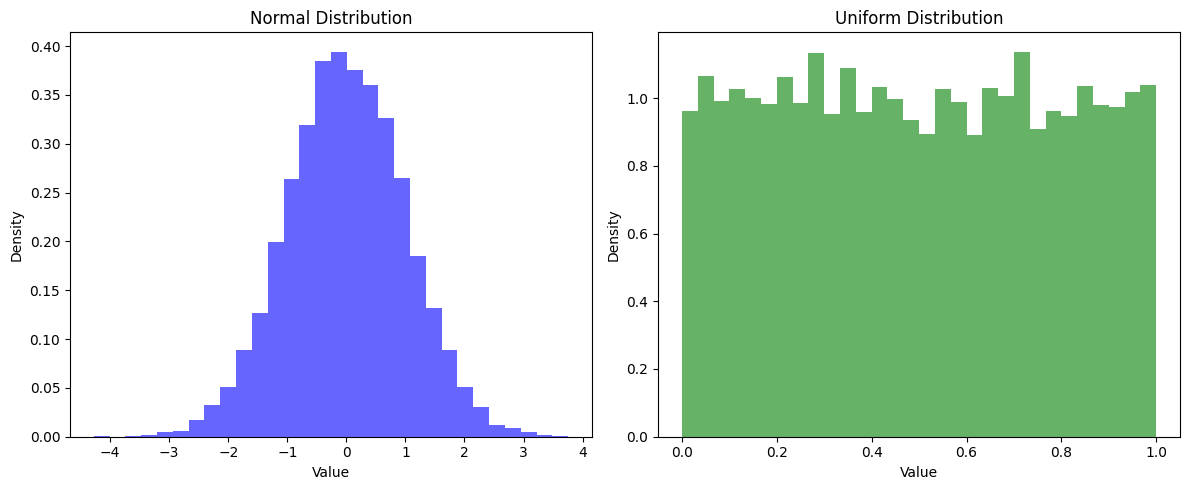

In [23]:
# Number of observations
n = 10000

# 1. Simulate a normal distribution with mean 0 and variance 1
mu = 0
sigma = 1
normal_data = np.random.normal(mu, sigma, n)

# 2. Simulate a uniform distribution between 0 and 1
uniform_data = np.random.uniform(0, 1, n)

# Calculate summary statistics for the normal distribution
normal_stats = stats.describe(normal_data)
uniform_stats = stats.describe(uniform_data)

# Unpack statistics: (n_obs, (min, max), mean, variance, skewness, kurtosis)
_, (_, _), normal_mean, normal_variance, normal_skewness, normal_kurtosis = normal_stats
_, (_, _), uniform_mean, uniform_variance, uniform_skewness, uniform_kurtosis = uniform_stats

# Calculate standard deviation from variance
normal_sd = np.sqrt(normal_variance)
uniform_sd = np.sqrt(uniform_variance)

# Create a DataFrame to store the statistics for both distributions
stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Variance', 'Standard Deviation', 'Skewness', 'Kurtosis'],
    'Normal Distribution': [normal_mean, normal_variance, normal_sd, normal_skewness, normal_kurtosis],
    'Uniform Distribution': [uniform_mean, uniform_variance, uniform_sd, uniform_skewness, uniform_kurtosis]
})

# Export to LaTeX
latex_table = stats_df.to_latex(index=False)
print(latex_table)

# Save the LaTeX table to a .tex file
with open("output/summary_statistics.tex", "w") as file:
    file.write(latex_table)
    
# Plot histograms
plt.figure(figsize=(12, 5))

# Plot Normal distribution
plt.subplot(1, 2, 1)
plt.hist(normal_data, bins=30, density=True, alpha=0.6, color='blue')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

# Plot Uniform distribution
plt.subplot(1, 2, 2)
plt.hist(uniform_data, bins=30, density=True, alpha=0.6, color='green')
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig('output/distributions.pdf', dpi=300)  # High-quality PDF with 300 dpi
plt.show()

# 3. Correlation
## 3.1 Simulating Two Variables with Different Degrees of Linear Relationship

Let $ X $ and $ Y $ be two random variables. The degree of linear relationship between them can be modeled using the following equation:
$$ Y = \rho X + \epsilon$$
Where:
+ $ \rho $ is the correlation coefficient (controls the strength and direction of the relationship),
+ $ \epsilon $ is the error term, which we assume is normally distributed with mean 0 and variance 1.

We will simulate cases where $ \rho = 0 $ (no relationship), $ \rho > 0 $ (positive relationship), and $ \rho < 0 $ (negative relationship).

## 3.2 Generating Spurious Correlation Using a Confounder

We can introduce a third variable, called a confounder, to generate a spurious correlation between $ X $ and $ Y $. Let $ Z $ be a confounder such that:

$$X = Z + \eta_X, \quad Y = Z + \eta_Y$$

Where $ \eta_X $ and $ \eta_Y $ are independent error terms.

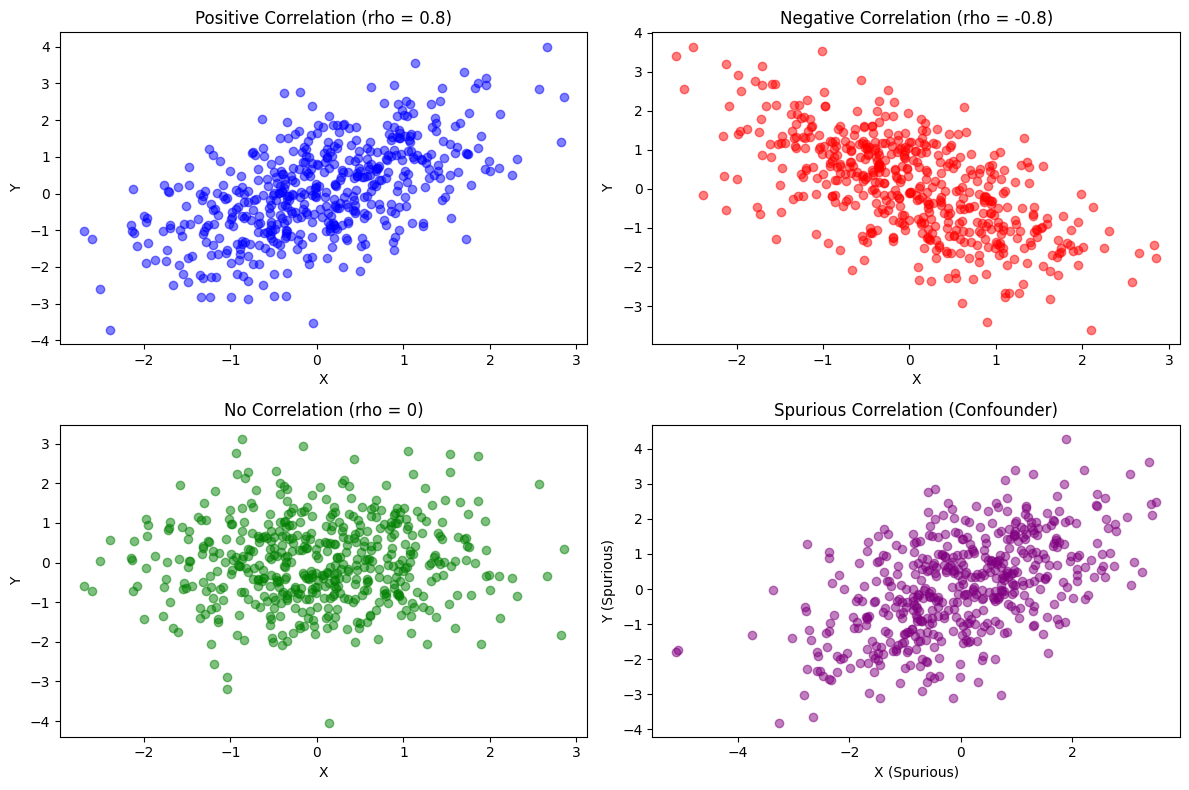

In [24]:
# Number of observations
n = 500

# 1. Simulate X and Y with varying degrees of linear relationship
rho_positive = 0.8   # Strong positive correlation
rho_negative = -0.8  # Strong negative correlation
rho_zero = 0         # No correlation

# Create X from a normal distribution
X = np.random.normal(0, 1, n)

# Generate Y with different degrees of correlation
Y_positive = rho_positive * X + np.random.normal(0, 1, n)
Y_negative = rho_negative * X + np.random.normal(0, 1, n)
Y_zero = rho_zero * X + np.random.normal(0, 1, n)

# 2. Generate spurious correlation using a confounder Z
Z = np.random.normal(0, 1, n)
X_spurious = Z + np.random.normal(0, 1, n)
Y_spurious = Z + np.random.normal(0, 1, n)

# 3. Plot scatter plots
plt.figure(figsize=(12, 8))

# Plot positive correlation
plt.subplot(2, 2, 1)
plt.scatter(X, Y_positive, color='blue', alpha=0.5)
plt.title('Positive Correlation (rho = 0.8)')
plt.xlabel('X')
plt.ylabel('Y')

# Plot negative correlation
plt.subplot(2, 2, 2)
plt.scatter(X, Y_negative, color='red', alpha=0.5)
plt.title('Negative Correlation (rho = -0.8)')
plt.xlabel('X')
plt.ylabel('Y')

# Plot zero correlation
plt.subplot(2, 2, 3)
plt.scatter(X, Y_zero, color='green', alpha=0.5)
plt.title('No Correlation (rho = 0)')
plt.xlabel('X')
plt.ylabel('Y')

# Plot spurious correlation
plt.subplot(2, 2, 4)
plt.scatter(X_spurious, Y_spurious, color='purple', alpha=0.5)
plt.title('Spurious Correlation (Confounder)')
plt.xlabel('X (Spurious)')
plt.ylabel('Y (Spurious)')

plt.tight_layout()
plt.savefig('output/correlations.pdf', dpi=300)
plt.show()

# 4. Conditional Sample Mean and Median

In this section, we will analyze a dataset of two variables: 

+ $ Y $: **Annual salaries** (continuous variable).
+ $ X $: **Age** (discrete variable).

The goal is to calculate the conditional mean and median salary based on different ages, and visualize the results.

The conditional mean and median of $ Y $ (salary) given $ X $ (age) are calculated as:

$$ E[Y|X = 20], \quad ..., \quad E[Y|X = 35] $$

We will also compute the median salary for each age.

In [25]:
# Read the csv file
df = pd.read_csv('input/salaries.csv')

# Filter the DataFrame to select rows where year == 1995
filtered_df = df[df['year'] == 1995]
filtered_df = filtered_df[(filtered_df['age'] >= 20) & (filtered_df['age'] <= 35)]
filtered_df.reset_index(drop=True, inplace=True)
filtered_df

,id,year,annual_salary,female,age,year_brth
0,836,1995,36049,0,35,1960
1,837,1995,32668,0,35,1960
2,935,1995,25930,1,35,1960
3,936,1995,8931,1,35,1960
4,937,1995,29016,1,35,1960
...,...,...,...,...,...,...
16306,22469,1995,33425,0,32,1963
16307,22470,1995,48136,0,29,1966
16308,22471,1995,22355,0,34,1961
16309,22474,1995,22074,1,23,1972


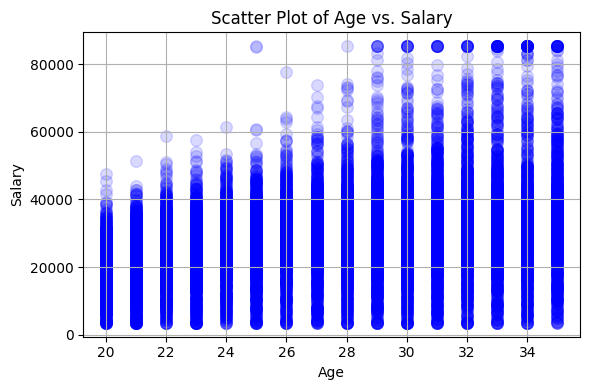

In [26]:
# Create a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(filtered_df['age'], filtered_df['annual_salary'], marker='o', color='blue', alpha=0.15, s=70)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Scatter Plot of Age vs. Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

### Unconditional mean

In [27]:
# Describe the 'annual_salary' column
unconditional = filtered_df['annual_salary'].describe()
unconditional

count    16311.000000
mean     29367.745203
std      12492.518380
min       3458.000000
25%      22250.500000
50%      29120.000000
75%      35418.000000
max      85407.000000
Name: annual_salary, dtype: float64

In [28]:
# Access and store the mean value
mean_value = unconditional['mean']
mean_value

29367.745202623995

### Conditional mean

In [29]:
# Conditional mean by sex
conditional = filtered_df[filtered_df['female'] == 1]['annual_salary'].describe()
conditional

count     5670.000000
mean     24374.263845
std      10392.810289
min       3458.000000
25%      17830.500000
50%      25009.000000
75%      29852.750000
max      85407.000000
Name: annual_salary, dtype: float64

## Approach 1

In [30]:
# Approach 1
results_df_1 = pd.DataFrame(columns=["Age", "Avg_salary"])
for i in range(20,36):

    conditional = filtered_df[filtered_df['age'] == i]['annual_salary'].describe()
    mean_value = conditional['mean']

    # Store the results in the DataFrame
    new_data = pd.DataFrame({'Age': [i], 'Avg_salary': [mean_value]})
    results_df_1 = pd.concat([results_df_1, new_data], ignore_index=True)

results_df_1

,Age,Avg_salary
0,20,19597.603730
1,21,23197.607335
2,22,25727.430275
3,23,26365.012111
4,24,27497.631132
5,25,28364.497585
6,26,29476.307534
7,27,29680.570362
8,28,30408.164271
9,29,31413.106608


## Approach 2

In [31]:
# Group by 'age' and calculate the mean for each group
results_df_2 = filtered_df.groupby('age')['annual_salary'].mean().reset_index()
results_df_2.columns = ['Age', 'Avg_salary']
results_df_2

,Age,Avg_salary
0,20,19597.603730
1,21,23197.607335
2,22,25727.430275
3,23,26365.012111
4,24,27497.631132
5,25,28364.497585
6,26,29476.307534
7,27,29680.570362
8,28,30408.164271
9,29,31413.106608


### Plot of conditional sample `means`

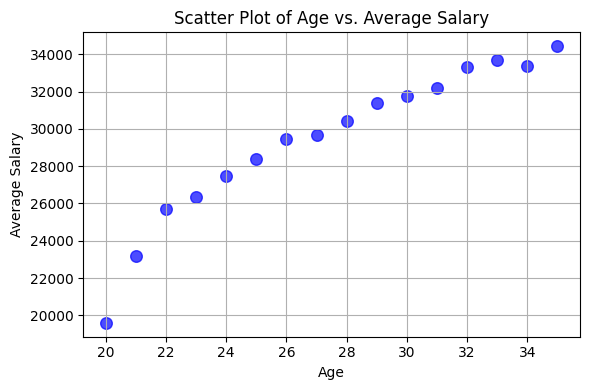

In [32]:
# Create a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(results_df_2['Age'], results_df_2['Avg_salary'], marker='o', color='blue', alpha=0.7, s=70)
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Scatter Plot of Age vs. Average Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

### Fitting a linear polynomial

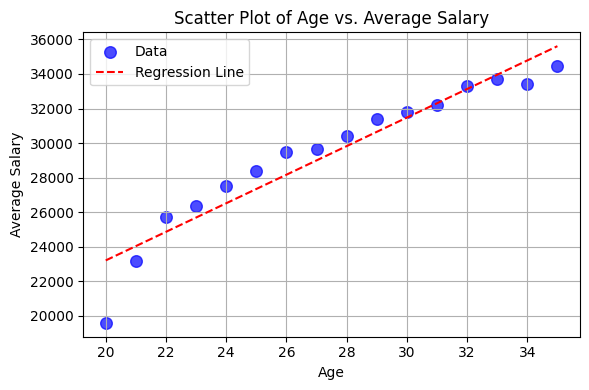

Slope (m): 826.2997305178193
Intercept (b): 6686.045038765613
R-squared: 0.907777454863896


In [33]:
# Scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(results_df_2['Age'], results_df_2['Avg_salary'], marker='o', color='blue', alpha=0.7, label='Data', s=70)

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(results_df_2['Age'], results_df_2['Avg_salary'])
regression_line = slope * results_df_2['Age'] + intercept
plt.plot(results_df_2['Age'], regression_line, color='red', linestyle='--', label='Regression Line')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Scatter Plot of Age vs. Average Salary')

# Show the plot
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Slope (m):", slope)
print("Intercept (b):", intercept)
print("R-squared:", r_value**2)

### Conditional sample `medians`

In [34]:
# Group by 'age' and calculate the median for each group
results_df_3 = filtered_df.groupby('age')['annual_salary'].median().reset_index()
results_df_3.columns = ['Age', 'Median_salary']
results_df_3

,Age,Median_salary
0,20,19972.0
1,21,24835.0
2,22,27113.0
3,23,27746.0
4,24,28320.0
5,25,29237.0
6,26,29647.0
7,27,30224.0
8,28,30811.0
9,29,31252.0


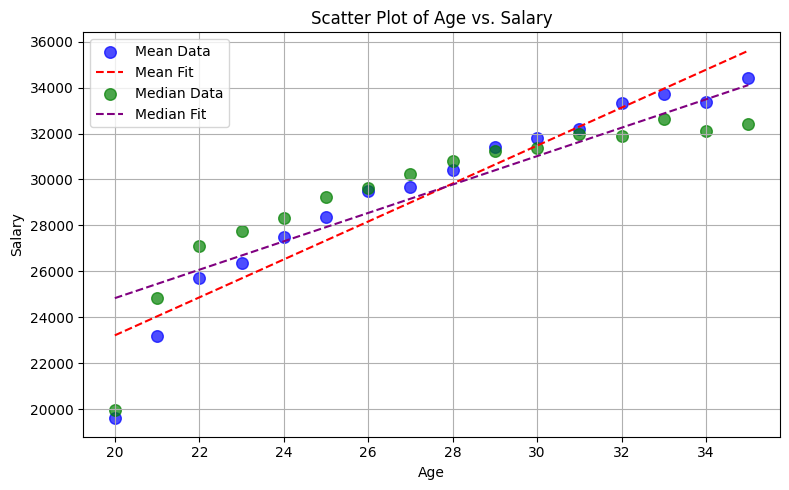

Slope for Avg Salary (m): 826.2997305178193
Intercept for Avg Salary (b): 6686.045038765613
R-squared for Avg Salary: 0.907777454863896
-----
Slope for Median Salary (m): 618.5367647058823
Intercept for Median Salary (b): 12460.988970588238
R-squared for Median Salary: 0.7722852918826157


In [35]:
# Scatter plot
plt.figure(figsize=(8, 5))

# Plotting Average Salary
plt.scatter(results_df_2['Age'], results_df_2['Avg_salary'], marker='o', color='blue', alpha=0.7, label='Mean Data', s=70)

# Linear regression for Average Salary
slope_avg, intercept_avg, r_value_avg, _, _ = stats.linregress(results_df_2['Age'], results_df_2['Avg_salary'])
regression_line_avg = slope_avg * results_df_2['Age'] + intercept_avg
plt.plot(results_df_2['Age'], regression_line_avg, color='red', linestyle='--', label='Mean Fit')

# Plotting Median Salary
plt.scatter(results_df_3['Age'], results_df_3['Median_salary'], marker='o', color='green', alpha=0.7, label='Median Data', s=70)

# Linear regression for Median Salary
slope_med, intercept_med, r_value_med, _, _ = stats.linregress(results_df_3['Age'], results_df_3['Median_salary'])
regression_line_med = slope_med * results_df_3['Age'] + intercept_med
plt.plot(results_df_2['Age'], regression_line_med, color='purple', linestyle='--', label='Median Fit')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Scatter Plot of Age vs. Salary')

# Show the plot
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Slope for Avg Salary (m):", slope_avg)
print("Intercept for Avg Salary (b):", intercept_avg)
print("R-squared for Avg Salary:", r_value_avg**2)
print('-----')
print("Slope for Median Salary (m):", slope_med)
print("Intercept for Median Salary (b):", intercept_med)
print("R-squared for Median Salary:", r_value_med**2)

# 5. Frequency vs Density Histograms

`Frequency Histogram:`
$$ h_i = f_i $$
The heights of the bars represent the number of observations in each bin.

`Relative Frequency Histogram:`
$$ h_i = \frac{f_i}{N} $$
The heights of the bars represent the proportion of observations in each bin relative to the total number of observations.

`Density Histogram:`
$$ h_i = \frac{f_i}{w_i \cdot N} $$
The heights of the bars represent the density of observations in each bin.

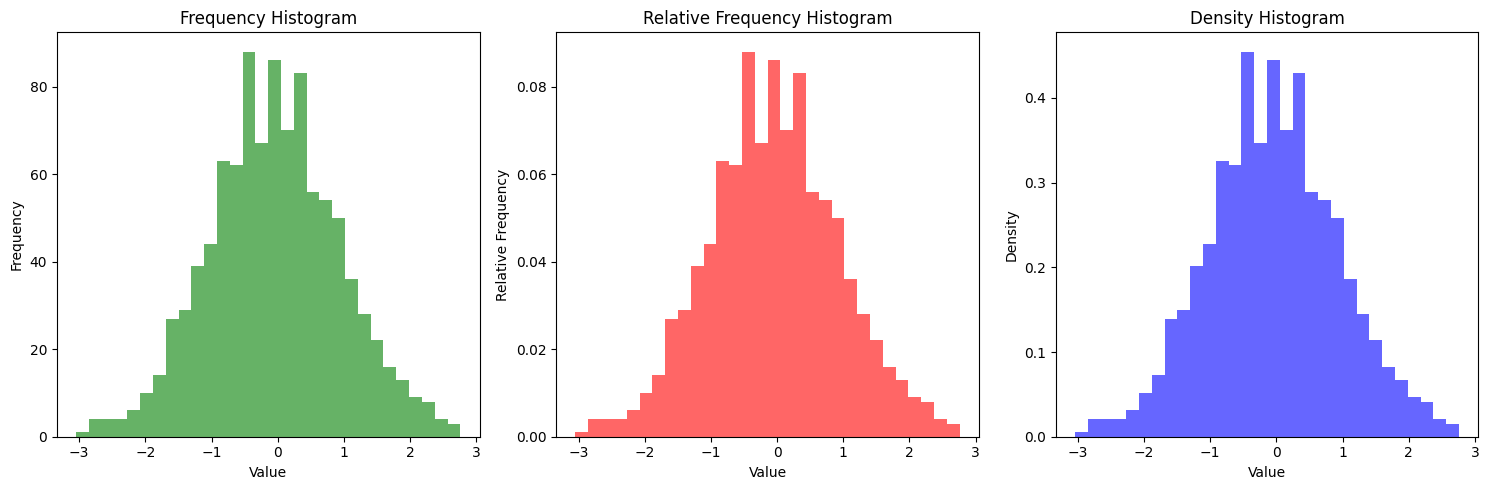

In [36]:
# Generate random variables from N(0,1)
np.random.seed(0)
data = np.random.randn(1000)

# Set up the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5), tight_layout=True)

# Frequency Histogram
axs[0].hist(data, bins=30, alpha=0.6, color='g')
axs[0].set_title('Frequency Histogram')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Relative Frequency Histogram
weights = np.ones_like(data) / len(data)
axs[1].hist(data, bins=30, weights=weights, alpha=0.6, color='r')
axs[1].set_title('Relative Frequency Histogram')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Relative Frequency')

# Density Histogram
axs[2].hist(data, bins=30, density=True, alpha=0.6, color='b')
axs[2].set_title('Density Histogram')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Density')

plt.show()

## 5.1 Binwidth 

In [ ]:
import ipywidgets as widgets

# Generate random variables from N(0,1)
np.random.seed(0)
data = np.random.randn(1000)

def plot_hist(bin_width):
    plt.figure(figsize=(8,5))
    # Calculate the number of bins from bin width
    range_width = np.max(data) - np.min(data)
    nbins = int(range_width / bin_width)
    plt.hist(data, bins=nbins, density=True, alpha=0.6, color='g')
    plt.title('Interactive Density Histogram')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

bin_width_slider = widgets.FloatSlider(min=0.1, max=1, step=0.1, value=0.5, description='Bin Width:')
widgets.interactive(plot_hist, bin_width=bin_width_slider)

## 5.2 Kernel

In [ ]:
# the Kernel function (Gaussian kernel)
def K(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# dummy dataset
dataset = np.array([1.33, 0.3, 0.97, 1.1, 0.1, 1.4, 0.4])

# x-value range for plotting KDEs
x_range = np.linspace(dataset.min() - 0.3, dataset.max() + 0.3, num=600)

# bandwidth values for experimentation
H = [0.3, 0.1, 0.03]
n_samples = dataset.size

# line properties for different bandwidth values
color_list = ['goldenrod', 'black', 'maroon']
alpha_list = [0.8, 1, 0.8]
width_list = [1.7, 2.5, 1.7]

plt.figure(figsize=(10, 4))

# iterate over bandwidth values
for h, color, alpha, width in zip(H, color_list, alpha_list, width_list):
    total_sum = np.zeros_like(x_range)  # Create an array to accumulate the kernel values
    # iterate over datapoints
    for i, xi in enumerate(dataset):
        total_sum += K((x_range - xi) / h)  # Add the kernel density contribution from each data point
        plt.annotate(r'$x_{}$'.format(i + 1),
                     xy=[xi, 0.13],
                     horizontalalignment='center',
                     fontsize=18)

    y_range = total_sum / (h * n_samples)  # KDE formula
    plt.plot(x_range, y_range, 
             color=color, alpha=alpha, linewidth=width, 
             label=f'h={h}')

    plt.plot(dataset, np.zeros_like(dataset), 's', 
             markersize=6, color='black')

plt.xlabel('$x$', fontsize=16)
plt.ylabel('$f(x)$', fontsize=16, rotation='horizontal', labelpad=16)
plt.legend(fontsize=10, shadow=True, title='$h$', title_fontsize=16)
plt.grid(True)
plt.show()

# 6. Bivariate Normal

Random variables $Y_1$ and $Y_2$ are defined as jointly normal if their joint probability density function is given by:

$$f_{Y_1,Y_2}(y_1, y_2) = \frac{(1-\rho^2)^{-\frac{1}{2}}}{2\pi \sigma_1 \sigma_2} \exp \left\{ -\frac{1}{2(1-\rho^2)} \left[ \left( \frac{y_1 - \mu_1}{\sigma_1} \right)^2 - 2\rho \left( \frac{y_1 - \mu_1}{\sigma_1} \right) \left( \frac{y_2 - \mu_2}{\sigma_2} \right) + \left( \frac{y_2 - \mu_2}{\sigma_2} \right)^2 \right] \right\}$$

where $\rho = \frac{\sigma_{12}}{\sigma_1 \sigma_2}$.

Notice that the shape of the function depends on 5 parameters: 
$\quad f_{Y_1,Y_2}(y_1, y_2; \mu_1, \mu_2, \sigma_1^2, \sigma_2^2, \rho)$

We denote the joint normal as:

$$\begin{bmatrix} Y_1 \\ Y_2 \end{bmatrix} \sim N \left( \begin{bmatrix} \mu_1 \\ \mu_2 \end{bmatrix}, \begin{bmatrix} \sigma_1^2 & \sigma_{12} \\ \sigma_{12} & \sigma_2^2 \end{bmatrix} \right)$$

or

$$\mathbf{Y} \sim N(\mu, \Sigma)$$


+ The covariance matrix in any Multivariate Normal Distribution is a symmetric matrix.
+ $\sigma_{12} = \sigma_{21}$, the covariance between $X$ and $Y$ is the same as the covariance of $Y$ and $X$.
+ The symmetry of the covariance matrix is crucial for it to be positive semi-definite, a property that is necessary to ensure that the multivariate normal distribution is a valid probability distribution (ensuring non-negative variance). 

In [21]:
from scipy.stats import multivariate_normal
import plotly.express as px

def plot_bivariate_normal(mu1, mu2, sigma1, sigma2, sigma12):
    mu = np.array([mu1, mu2])
    sigma = np.array([[sigma1, sigma12], [sigma12, sigma2]])
    
    x = np.linspace(mu[0] - 3*np.sqrt(sigma[0, 0]), mu[0] + 3*np.sqrt(sigma[0, 0]), 100)
    y = np.linspace(mu[1] - 3*np.sqrt(sigma[1, 1]), mu[1] + 3*np.sqrt(sigma[1, 1]), 100)
    
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    
    density = multivariate_normal(mu, sigma).pdf(pos)
    
    # 3D plot
    grid = pd.DataFrame({'x': X.ravel(), 'y': Y.ravel(), 'z': density.ravel()})
    fig_3d = px.scatter_3d(grid, x='x', y='y', z='z', color='z')
    fig_3d.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Density'),
                         title='3D Scatter Plot of a Bivariate Normal Distribution')
    
    # 2D contour plot
    fig_2d, ax = plt.subplots(figsize=(8, 6))
    cp = ax.contour(X, Y, density, colors='blue', levels=20)
    fig_2d.colorbar(cp, ax=ax, label='Density')
    ax.set_title('Contour Plot of a Bivariate Normal Distribution')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
    return fig_3d, fig_2d

In [ ]:
# Generate the plots
fig_3d, fig_2d = plot_bivariate_normal(mu1=0, mu2=0, sigma1=1, sigma2=1, sigma12=0)

# Display the 3D plot
fig_3d.show()

# Display the 2D plot
plt.show()

In [ ]:
# Generate the plots
fig_3d, fig_2d = plot_bivariate_normal(mu1=0, mu2=0, sigma1=1, sigma2=1, sigma12=0.8)

# Display the 3D plot
fig_3d.show()

# Display the 2D plot
plt.show()